In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings

In [2]:
data = pd.read_csv('Heart Disease data.csv')

In [3]:
data.shape

(1025, 14)

In [26]:
data.info

<bound method DataFrame.info of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

In [27]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [28]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [29]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [30]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## ETL

In [31]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_cols

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [32]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
numerical_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [33]:
# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols)
# data_encoded

In [34]:
# scaler = StandardScaler()
# data_encoded = scaler.fit_transform(data[numerical_cols])
scaler = StandardScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

In [35]:
data_encoded.shape

(1025, 31)

## EDA

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

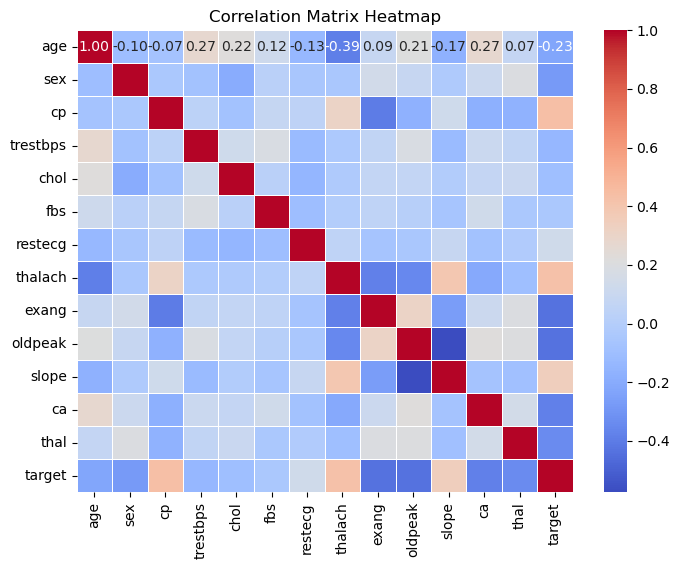

In [37]:
# Correlation analysis
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
pip install --upgrade seaborn matplotlib

C:\Users\Win-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Win-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Win-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Win-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

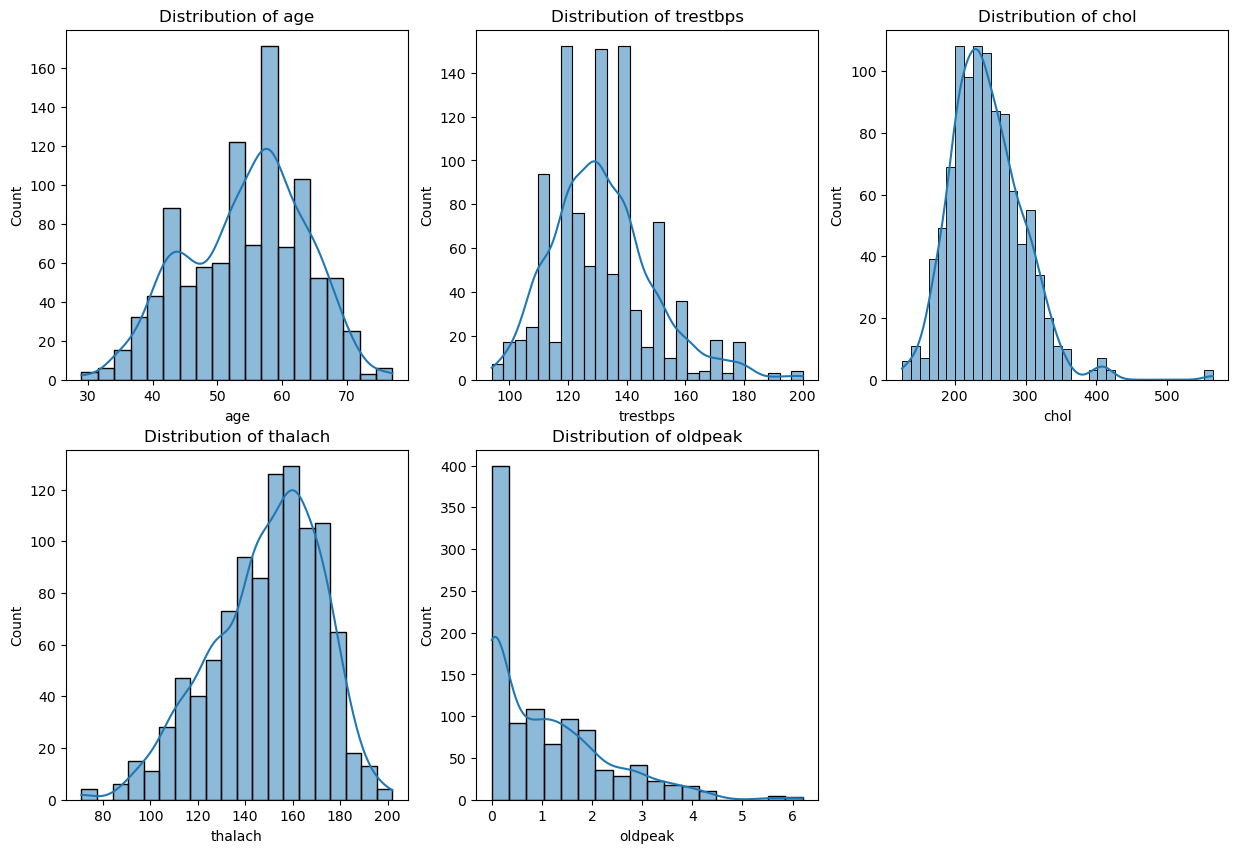

In [38]:
# Distribution of numerical features
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.show()

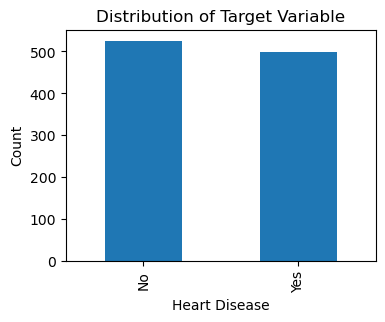

In [42]:
# Target variable distribution
plt.figure(figsize=(4, 3))
data['target'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

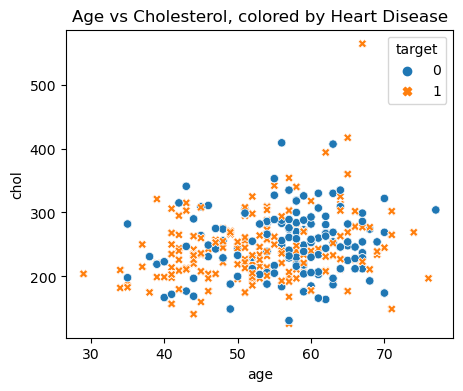

In [43]:
# Relationship between age, cholesterol, and heart disease
plt.figure(figsize=(5, 4))
sns.scatterplot(data=data, x='age', y='chol', hue='target', style='target')
plt.title('Age vs Cholesterol, colored by Heart Disease')
plt.show()

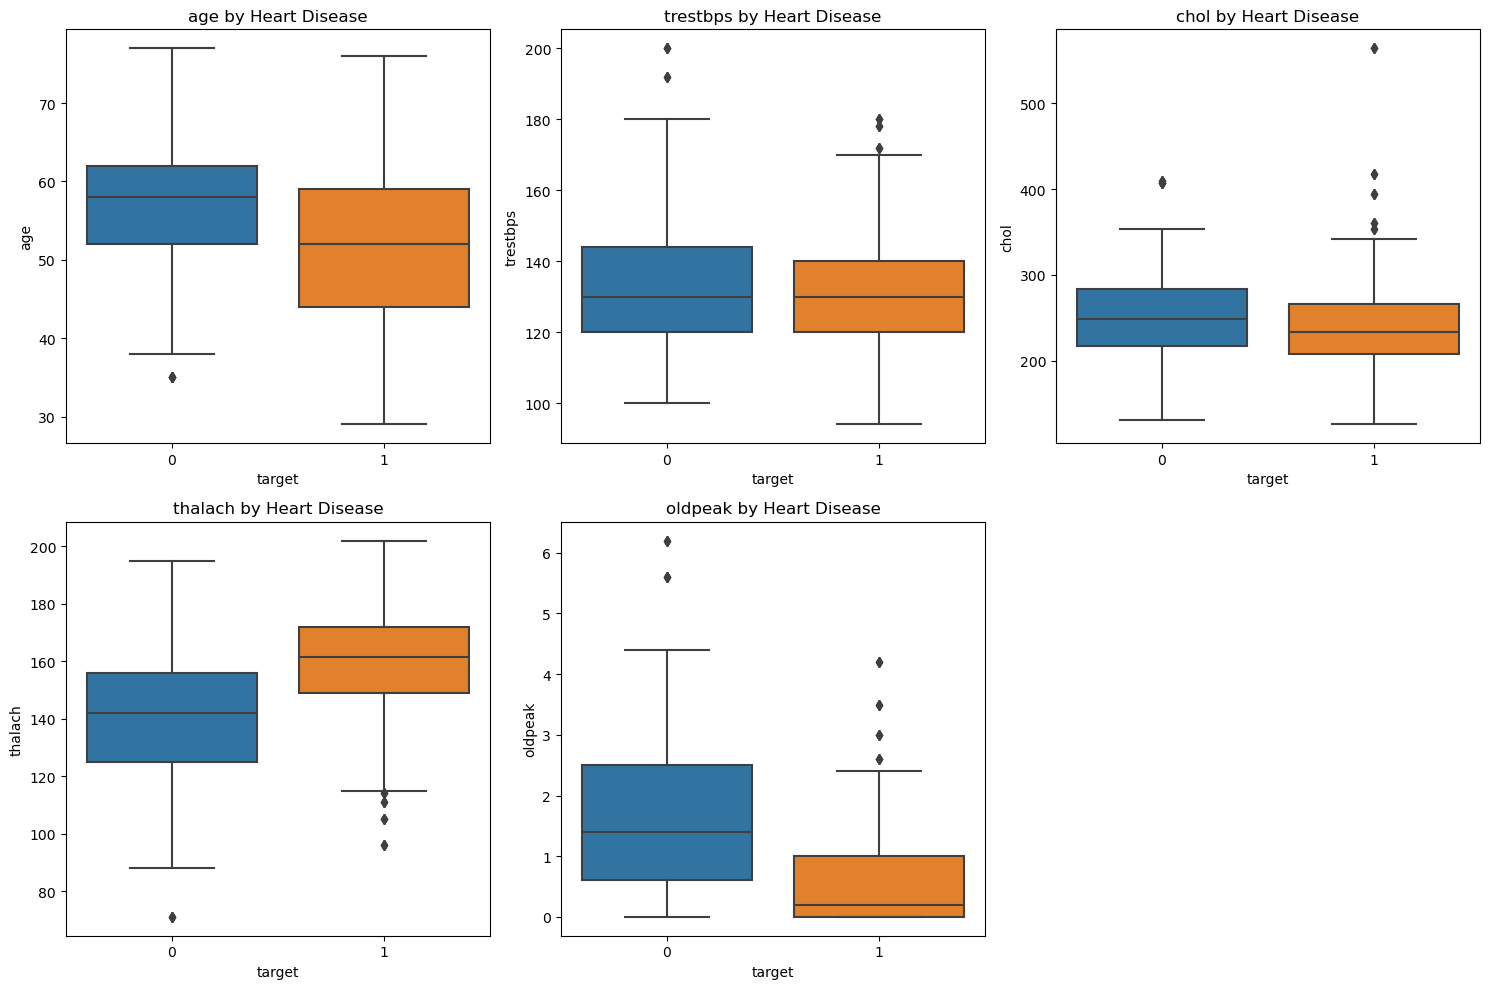

In [44]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, x='target', y=col)
    plt.title(f'{col} by Heart Disease')
plt.tight_layout()
plt.show()

In [45]:
# Feature importance using mutual information
from sklearn.feature_selection import mutual_info_classif

X = data.drop('target', axis=1)
y = data['target']
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

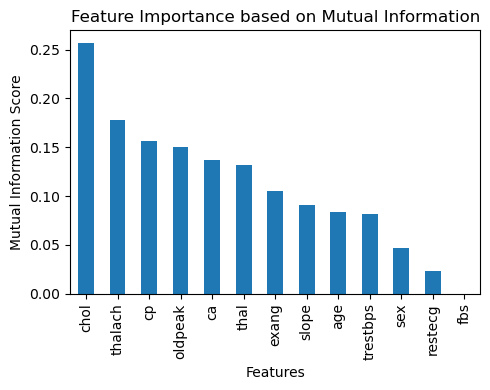

In [46]:
plt.figure(figsize=(5, 4))
mi_scores.plot.bar()
plt.title('Feature Importance based on Mutual Information')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.tight_layout()
plt.show()

In [47]:
mi_scores

chol        0.256803
thalach     0.177804
cp          0.156147
oldpeak     0.150696
ca          0.137242
thal        0.132206
exang       0.105506
slope       0.091339
age         0.083294
trestbps    0.082043
sex         0.046988
restecg     0.023141
fbs         0.000000
Name: MI Scores, dtype: float64

In [48]:
# Statistical tests
print("\nStatistical Tests:")
for col in numerical_cols:
    t_stat, p_value = stats.ttest_ind(data[data['target'] == 0][col], 
                                      data[data['target'] == 1][col])
    print(f"{col}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}") #{t_stat:.4f},{p_value:.4f}: Formats the t-statistic &p-value to four decimal places.


Statistical Tests:
age: t-statistic = 7.5356, p-value = 0.0000
trestbps: t-statistic = 4.4819, p-value = 0.0000
chol: t-statistic = 3.2134, p-value = 0.0014
thalach: t-statistic = -14.9265, p-value = 0.0000
oldpeak: t-statistic = 15.6029, p-value = 0.0000


## Train-test-split

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [50]:
# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

In [51]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Perform cross-validation
# cv_scores = cross_val_score(model, X, y, cv=5)

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Create a pipeline with scaling and logistic regression
pipeline = LogisticRegression()
pipeline.fit(X_train, y_train)
# Make predictions
y_pred = pipeline.predict(X_test)
#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print(f'Accuracy_score:{accuracy}')
print(f'Cross-Validation Scores: {cv_scores}')


Accuracy_score:0.7853658536585366
Cross-Validation Scores: [0.88292683 0.83902439 0.87317073 0.8195122  0.8       ]


C:\Users\Win-10\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Win-10\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [129]:
# # Initialize models
# models = {
#     'Logistic Regression': LogisticRegression(),
#     'Decision Tree': DecisionTreeClassifier(random_state=42),
#     'Random Forest': RandomForestClassifier(random_state=42),
#     'SVM': SVC(random_state=42)
# }

In [130]:
# Initialize models with scaling included in the pipeline
models = {
    'Logistic Regression': make_pipeline(StandardScaler() LogisticRegression(max_iter=1000)),
    'Decision Tree': make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=42)),
    'Random Forest': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42)),
    'SVM': make_pipeline(StandardScaler(), SVC(random_state=42))
}

In [132]:
# Train and evaluate models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    }
       # Print results
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cross-validation mean accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(f'confusion_matrix_{name.replace(" ", "_").lower()}.png')
    plt.close()


Logistic Regression:
Accuracy: 0.7951
Cross-validation mean accuracy: 0.8459 (+/- 0.0557)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205


Decision Tree:
Accuracy: 0.9854
Cross-validation mean accuracy: 1.0000 (+/- 0.0000)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Random Forest:
Accuracy: 0.9854
Cross-validation mean accuracy: 0.9971 (+/- 0.0117)

Classification Report:
             

In [133]:
# Compare model performances
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                     Accuracy   CV Mean    CV Std
Logistic Regression  0.795122  0.845854  0.027869
Decision Tree        0.985366  1.000000  0.000000
Random Forest        0.985366  0.997073  0.005854
SVM                  0.887805  0.920976  0.033428


<Figure size 1000x600 with 0 Axes>

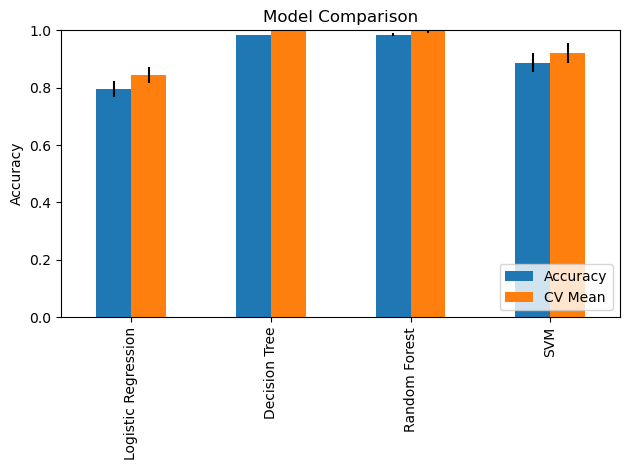

In [134]:
# Visualize model comparison
plt.figure(figsize=(10, 6))
results_df[['Accuracy', 'CV Mean']].plot(kind='bar', yerr=results_df['CV Std'])
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

In [138]:
# Identify the best model
best_model_name = results_df['CV Mean'].idxmax()
best_model = models[best_model_name]
print(f"\nBest performing model: {best_model_name}")
print(f"Cross-validation mean accuracy: {results_df.loc[best_model_name, 'CV Mean']:.4f}")


Best performing model: Decision Tree
Cross-validation mean accuracy: 1.0000


In [139]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205

[[85 17]
 [ 6 97]]
